## Data Preparation and Wrangling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df= pd.read_csv('./data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


##Exploratory Data Analysis
**kolom 'id' dan kolom 'unnamed: 32' dihapus.
Tanpa Handling Outlier**

In [6]:
del df['id']

In [7]:
del df['Unnamed: 32']

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Target Kolum 'Diagnosis'

In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

           radius_mean
diagnosis             
B                  357
M                  212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


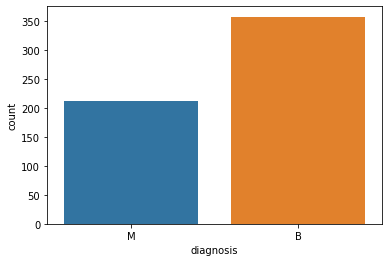

In [10]:
sns.countplot(df['diagnosis'],label="Count")
print(df[['radius_mean', 'diagnosis']].groupby('diagnosis').count())


In [11]:
# diag_dum = pd.get_dummies(df['diagnosis'], prefix= "diag")
# diag_dum.head()

In [12]:
# diag_dum = pd.concat([df, diag_dum], axis = 1)
# diag_dum.head()

In [13]:
# del diag_dum['diagnosis']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le= LabelEncoder()

In [16]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [17]:
#ganti df['diagnosis] menjadi numerikal 1= M, 0= B
df['diag_label'] = le.fit_transform(df['diagnosis'])

In [18]:
#menghapus tabel diagnosis kategorikal
del df['diagnosis']

**Banyak Fitur jadi unutk visualisasi maka feature dikelompokan dulu sehingga dapat melihat korelasi dengan jelas, Bagi kedalam 3 kelompok dengan rentang 10 features**

In [19]:
satu= df.iloc[:, 0:10]
satu['diagnosis']= df['diag_label']
dua= df.iloc[:, 10:21]
dua['diagnosis']= df['diag_label']
tiga= df.iloc[:, 21:] 

In [20]:
cat_1 = [i for i in satu.select_dtypes(exclude = 'object')]
cat_2 = [i for i in dua.select_dtypes(exclude = 'object')]
cat_3 = [i for i in tiga.select_dtypes(exclude = 'object')]

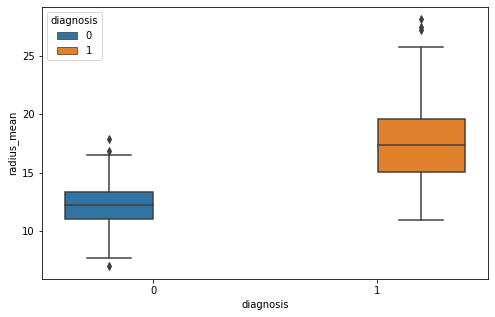

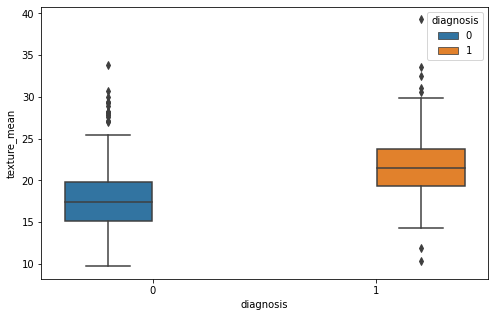

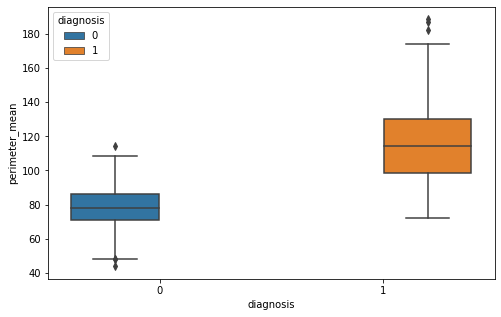

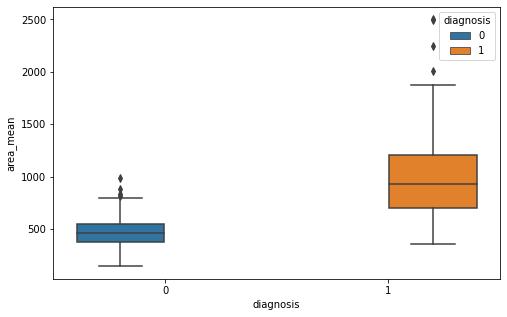

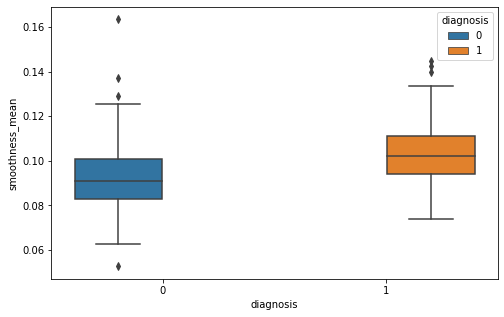

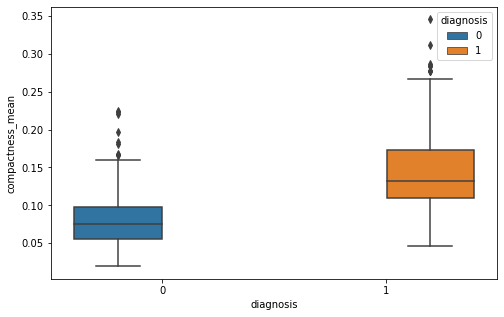

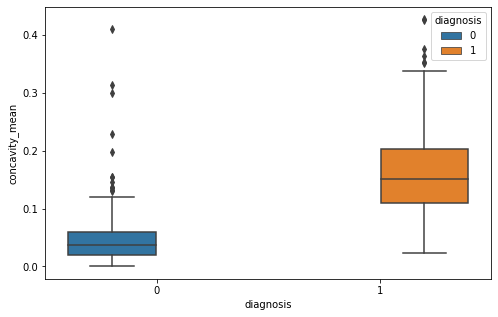

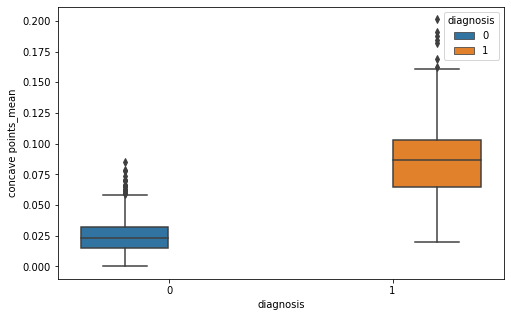

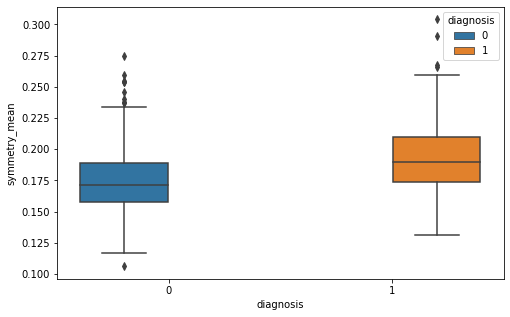

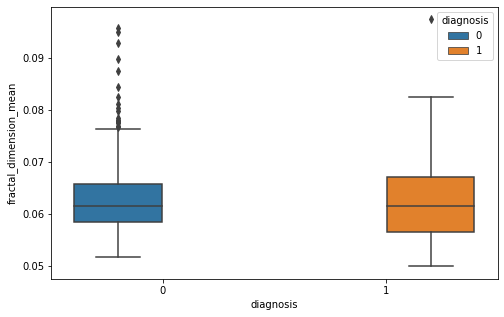

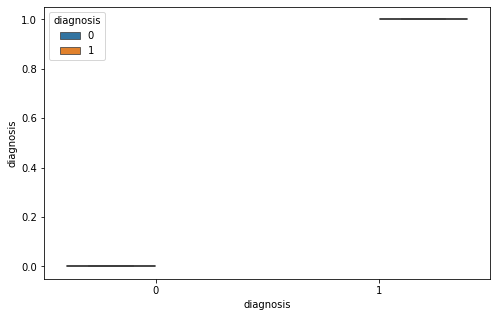

In [21]:
for i in cat_1 :
    plt.figure(figsize = (8,5))
    sns.boxplot(x='diagnosis', y= satu[i],
                 data = satu,
                 hue = 'diagnosis')
    # plt.show()

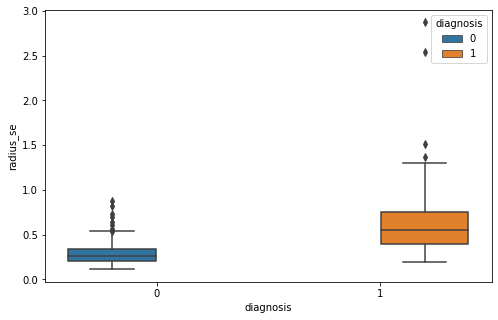

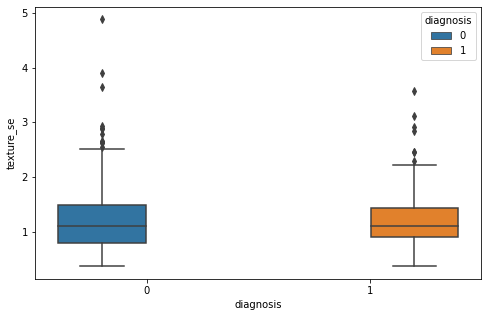

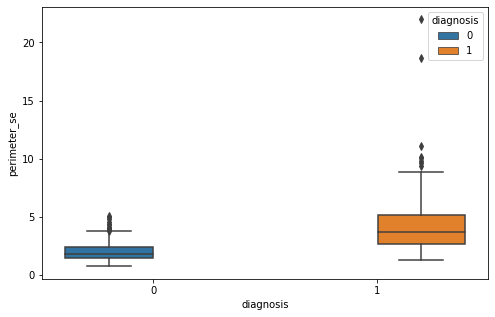

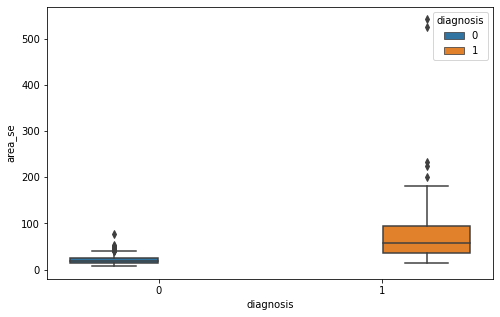

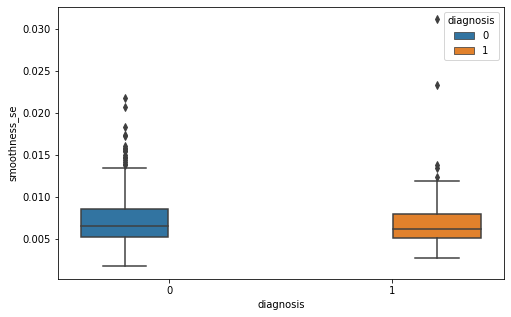

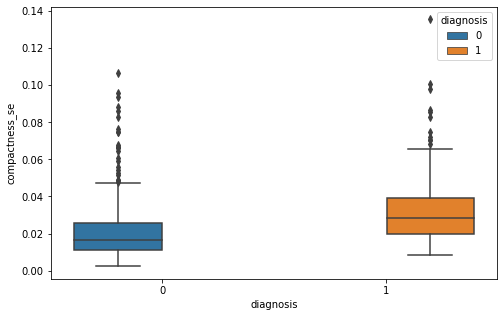

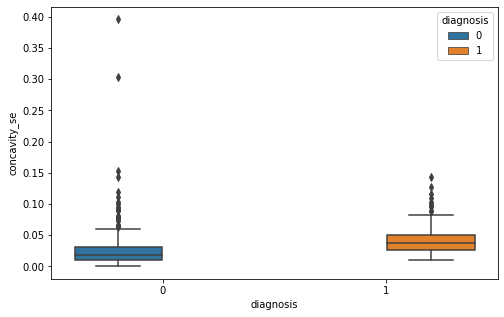

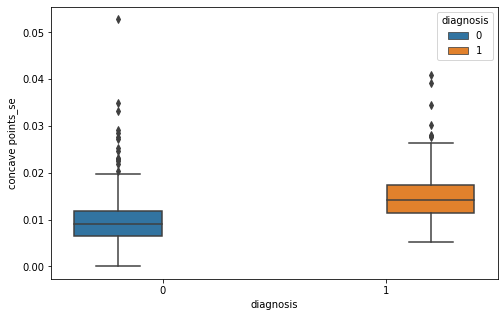

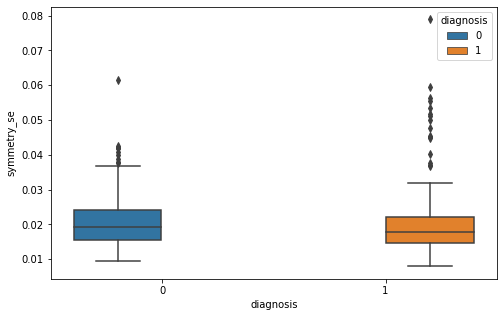

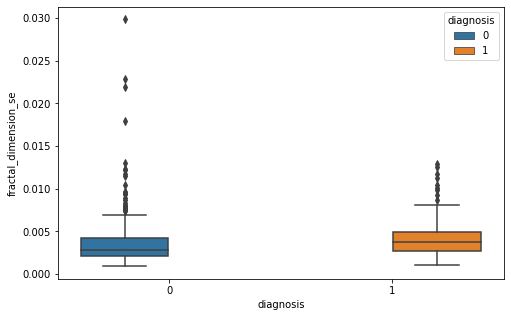

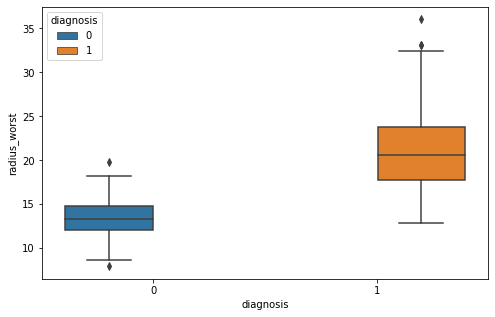

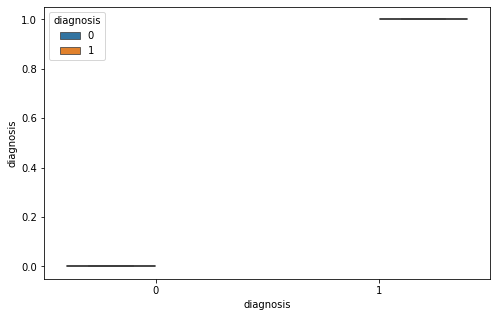

In [22]:
for i in cat_2 :
    plt.figure(figsize = (8,5))
    sns.boxplot(x='diagnosis', y= dua[i],
                 data = dua,
                 hue = 'diagnosis')
    # plt.show()

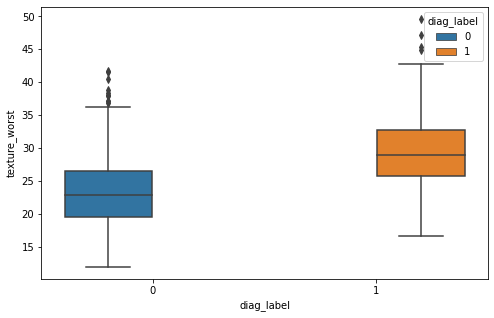

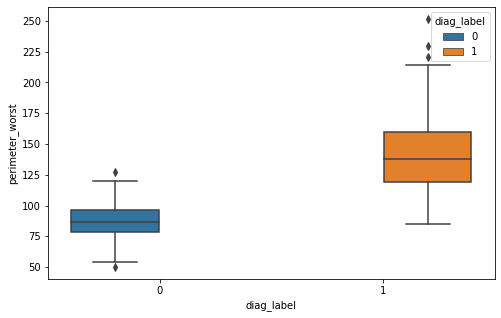

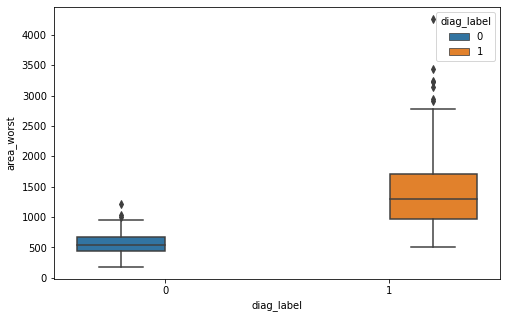

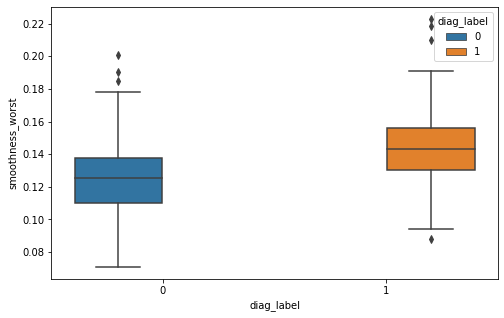

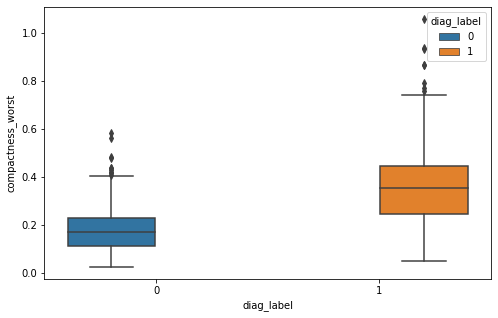

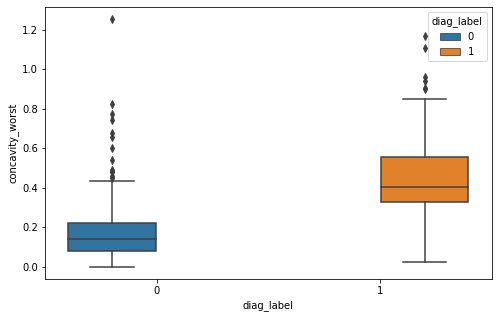

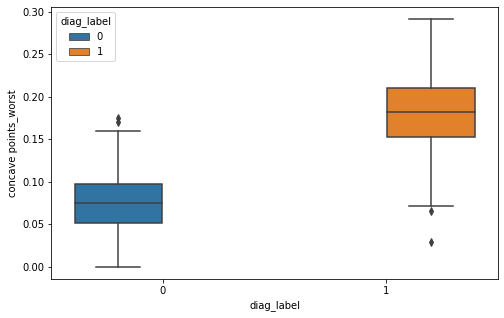

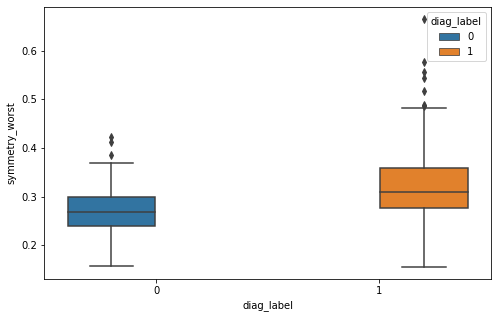

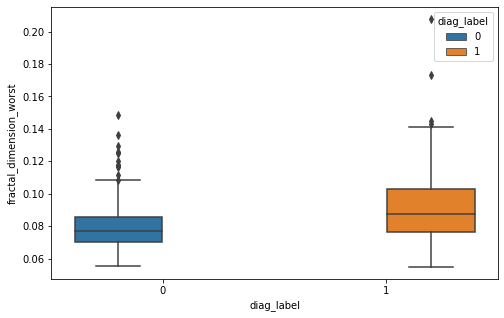

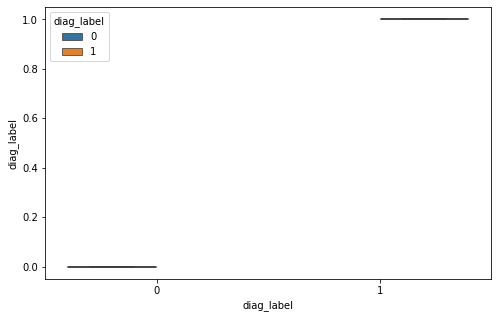

In [23]:
for i in cat_3:
    plt.figure(figsize = (8,5))
    sns.boxplot(x='diag_label', y= tiga[i],
                 data= tiga,
                 hue= 'diag_label')
    # plt.show()

**Meskipun terdapat banyak outlier namun pada proses machine learning ini tidak akan dilakukan handling outlier dulu sehingga jika hasilnya sudah melebihi standar 0.75 maka data sudah bisa dikatakan valid digunakan. Jika hasil kurang dari 0.75 maka data perlu dihandling outlier**

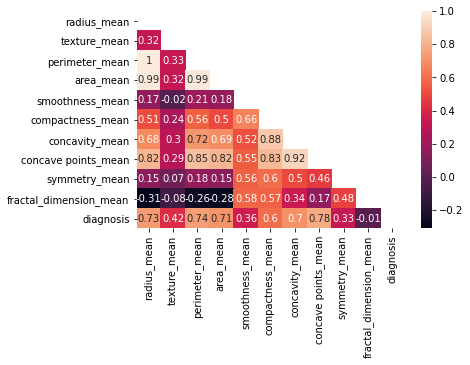

In [24]:
matrix = np.triu(satu.corr())
sns.heatmap(satu.corr().round(2), annot=True, fmt='.2g', mask= matrix)

**Korelasi Kuat = Radius Mean, Perimeter mean, Area_mean, concavity_mean, Concave points mean VS Diagnosis**

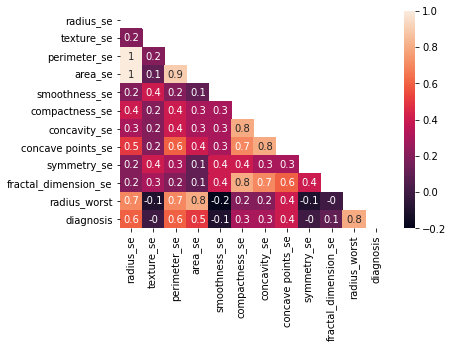

In [25]:
matrix = np.triu(dua.corr())
sns.heatmap(dua.corr().round(1), annot=True, fmt='.2g', mask= matrix)

**Korelasi Kuat Radius Worst VS Diagnosis**

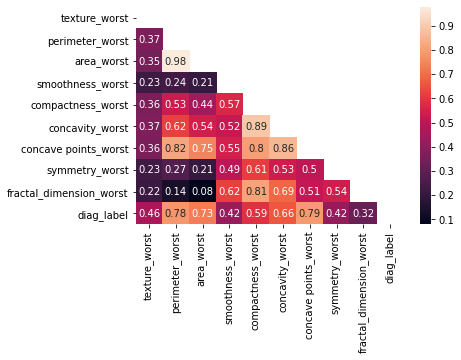

In [26]:
matrix = np.triu(tiga.corr())
sns.heatmap(tiga.corr(), annot=True, fmt='.2g', mask= matrix)

**Korelasi Kuat di perimeter_worst, area_worst, Concave points_worst VS Diag_label**

**memilih parameter yang berkorelasi kuat dengan target, sehingga terpilih variabel-variabel dan target adalah: radius_mean,	perimeter_mean,	area_mean,	concavity_mean,	concave points_mean,	radius_worst,	perimeter_worst,	area_worst,	concave points_worst,	diagnosis**

##Standard Scale
**Perlu dilakukan standard scale karena beberapa model mungkin akan sensitif dengan scale seperti Naive Bayes dan KNN**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
satu.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis'],
      dtype='object')

In [30]:
satu_sc= satu[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']]
dua_sc= dua[['radius_worst']]
tiga_sc= tiga[['perimeter_worst', 'area_worst', 'concave points_worst']]

In [31]:
df_1= sc.fit_transform(satu_sc.astype(float))
df_2= sc.fit_transform(dua_sc.astype(float))
df_3= sc.fit_transform(tiga_sc.astype(float))

In [32]:
columns= ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
columns2= ['radius_worst']
columns3= ['perimeter_worst', 'area_worst', 'concave points_worst']

df_1= pd.DataFrame(df_1, columns=columns)
df_2= pd.DataFrame(df_2, columns=columns2)
df_3= pd.DataFrame(df_3, columns=columns3)

In [33]:
new_df= pd.concat([df_1, df_2, df_3],axis=1)

In [34]:
#menambah tabel diagnosis ke New_df untuk modeling
new_df['diagnosis']= satu['diagnosis']
new_df.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,1.097064,1.269934,0.984375,2.652874,2.532475,1.886690,2.303601,2.001237,2.296076,1
1,1.829821,1.685955,1.908708,-0.023846,0.548144,1.805927,1.535126,1.890489,1.087084,1
2,1.579888,1.566503,1.558884,1.363478,2.037231,1.511870,1.347475,1.456285,1.955000,1
3,-0.768909,-0.592687,-0.764464,1.915897,1.451707,-0.281464,-0.249939,-0.550021,2.175786,1
4,1.750297,1.776573,1.826229,1.371011,1.428493,1.298575,1.338539,1.220724,0.729259,1


In [35]:
s= ['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

#Machine Learning


**Train Split**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y= ['diagnosis']
x= [i for i in new_df.columns.values.tolist() if i not in y]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(new_df[x], new_df[y], test_size=0.2, random_state=12)

In [39]:
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape) 

(455, 9)
(114, 9)
(455, 1)
(114, 1)


**Model yang digunakan adalah Logistik Regression, SVC Linear dan RBF, Decision Tree, Random Forest, Niaive Bayes dan KNN**

**Data Modeling**
**Dibuat fungsi yang akan melakukan running terhadap model-model yang dipakai, sehingga untuk proses setelahnya hanya perlu dilakukan proses looping**

In [40]:
def models (x_train, y_train):

  #logistic regression
  from sklearn.linear_model import LogisticRegression
  logreg = LogisticRegression(random_state = 12)
  logreg.fit(x_train, y_train)
  
  

  #SVC Linear
  from sklearn import svm
  svm1 = svm.SVC(kernel = 'linear', random_state = 12)
  svm1.fit(x_train,y_train)
  

  #RBF Kernel
  from sklearn import svm
  svm2 = svm.SVC(kernel = 'rbf', random_state = 12)
  svm2.fit(x_train,y_train)
  

  #DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 12)
  tree.fit(x_train, y_train)
  

  #randomforest
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 12)
  rf.fit(x_train, y_train)

  #Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  nb = GaussianNB()
  nb.fit(x_train, y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(x_train, y_train)


  #Accuracy
  print('Model Logistik Regression', 'Akurasi= ', logreg.score(x_train, y_train),".\n")
  print('Model SVM Linear', 'Akurasi= ', svm1.score(x_train, y_train),".\n")
  print('Model SVM RBF', 'Akurasi= ', svm2.score(x_train, y_train),".\n")
  print('Model Decession Tree', 'Akurasi= ', tree.score(x_train, y_train),".\n")
  print('Model Random Forest', 'Akurasi= ', rf.score(x_train, y_train),".\n")
  print('Naive Bayes', 'Akurasi= ', nb.score(x_train, y_train),".\n")
  print('KNN', 'Akurasi= ', knn.score(x_train, y_train),".\n")
  return logreg, svm1, svm2, tree, rf, nb, knn

In [41]:
model1= models(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

Model Logistik Regression Akurasi=  0.9648351648351648 .

Model SVM Linear Akurasi=  0.9714285714285714 .

Model SVM RBF Akurasi=  0.9604395604395605 .

Model Decession Tree Akurasi=  1.0 .

Model Random Forest Akurasi=  0.989010989010989 .

Naive Bayes Akurasi=  0.9472527472527472 .

KNN Akurasi=  0.9736263736263736 .



##Model Evaluation

#Classification Report

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
model1

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
     verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
  

In [44]:
print("[0]= Logistic Regression")
print("[1]= SVC Linear")
print("[2]= SVC RBF")
print("[3]= Decision Tree")
print("[4]= Random Forest")
print("[5]= Naive Bayes")
print("[6]= KNN",'.\n')
for i in range(len(model1)):
  cr = classification_report(y_test, model1[i].predict(x_test))
  print("Classification Report: ",[i]) 
  print("testing Akurasi Data Test", model1[i].score(x_test, y_test))
  print(cr)
  print('\n')

[0]= Logistic Regression
[1]= SVC Linear
[2]= SVC RBF
[3]= Decision Tree
[4]= Random Forest
[5]= Naive Bayes
[6]= KNN .

Classification Report:  [0]
testing Akurasi Data Test 0.9298245614035088
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.95      0.88      0.91        48

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Classification Report:  [1]
testing Akurasi Data Test 0.9473684210526315
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.96      0.92      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



Classification Report:  [2]
testing Akurasi Data Test 0.9210526315789473
  

**F1 Score untuk setiap model**

In [45]:
print("[0]= Logistic Regression")
print("[1]= SVC Linear")
print("[2]= SVC RBF")
print("[3]= Decision Tree")
print("[4]= Random Forest")
print("[5]= Naive Bayes")
print("[6]= KNN",'.\n')

from sklearn.metrics import f1_score
for i in range(len(model1)):
  F_1= f1_score(y_test,model1[i].predict(x_test),average='weighted',labels=np.unique(model1[i].predict(x_test)))
  print("F1 Score", [i],"=", F_1)


[0]= Logistic Regression
[1]= SVC Linear
[2]= SVC RBF
[3]= Decision Tree
[4]= Random Forest
[5]= Naive Bayes
[6]= KNN .

F1 Score [0] = 0.9293310001346077
F1 Score [1] = 0.947201283615517
F1 Score [2] = 0.9199358431646167
F1 Score [3] = 0.9385041551246538
F1 Score [4] = 0.9203243932402595
F1 Score [5] = 0.9203243932402595
F1 Score [6] = 0.9290109331299263


**Merubah Test Size dapat meningkatkan nilai F1 Score**

**Mereduksi Parameter juga mempengaruhi nilai Akurasi dan F1 Score**

**Gridsearch CV**

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm


In [47]:
parameters = {
    'C' : [0, 0.001, 0.01, 0.1, 0,5],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1, 0.5, 1, 1.1]
}

In [48]:
svm1 = svm.SVC(kernel = 'linear')
svm_grid = GridSearchCV(svm1, parameters, n_jobs = 1, cv = 10)

In [ ]:
svm_grid.fit(x_train,y_train)

In [50]:
svm_grid.best_params_

{'C': 5, 'gamma': 0.5, 'kernel': 'rbf'}

**Test Grid with C: 5, gamma: 0.1 and Kernel : Linear**


In [51]:
# testing
from sklearn import svm
svm2 = svm.SVC(kernel = 'linear', C = 5, gamma = 0.1)
svm2.fit(x_train,y_train)
y_pred_3 = svm2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
print("testing Akurasi Data Test", svm2.score(x_test, y_test),'.\n')
F1_SVM= f1_score(y_test,svm2.predict(x_test),average='weighted',labels=np.unique(model1[i].predict(x_test)))
print("F1 Score SVM with Grid Search= ", F1_SVM)

testing Akurasi Data Test 0.956140350877193 .

F1 Score SVM with Grid Search=  0.9559202666163618


**Sehingga jika dibandingkkan dengan uji akurasi model dan uji F1, maka SVC dengan kernel linear, c=5 dan gamma= 0.1, memiliki nilai F1 Score yang lebih tinggi**


#Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix

{LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}


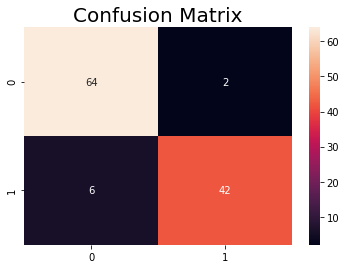

{SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)}


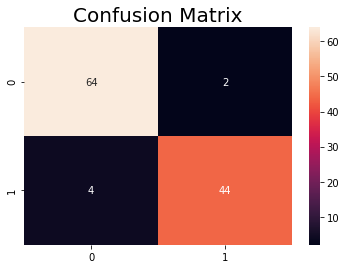

{SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)}


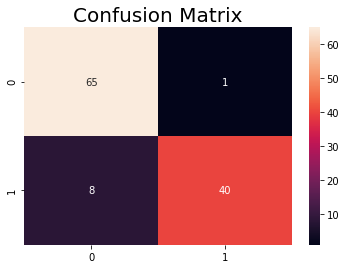

{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')}


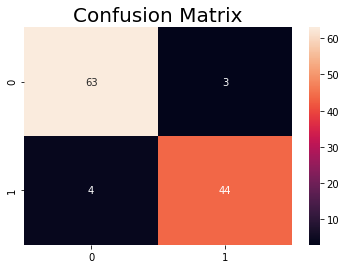

{RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)}


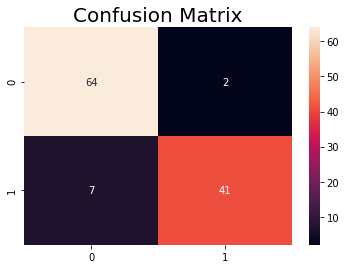

{GaussianNB(priors=None, var_smoothing=1e-09)}


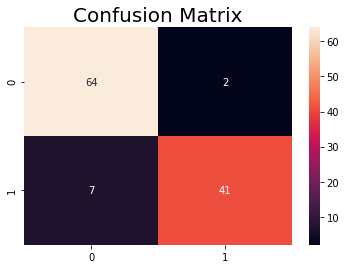

{KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')}


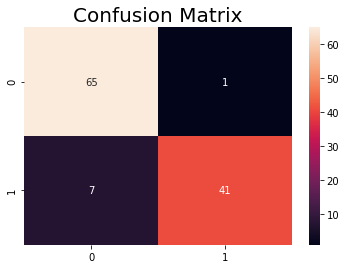

In [54]:
# print("[0]= Logistic Regression")
# print("[1]= SVC Linear")
# print("[2]= SVC RBF")
# print("[3]= Decision Tree")
# print("[4]= Random Forest",'.\n')

for i in range(len(model1)):
  cm = confusion_matrix(y_test, model1[i].predict(x_test))
  print({model1[i]})
  # print(cm,'.\n')
  sns.heatmap(cm, annot = True)
  plt.title('Confusion Matrix', fontsize=20)
  # print([i])
  plt.show()

**Confusion Matrix relatif rendah dan model bagus**

##Estimator untuk Random Forest, KNN, dan Naive Bayes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


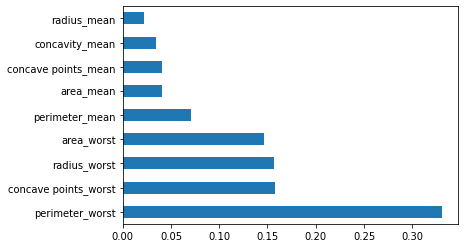

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 12)
rf.fit(x_train, y_train)

X_ = np.array(x)
importance_scores = rf.feature_importances_
indices = np.argsort(importance_scores)
feature_importances = pd.Series(importance_scores, index=X_)
feature_importances.nlargest(10).plot(kind='barh')

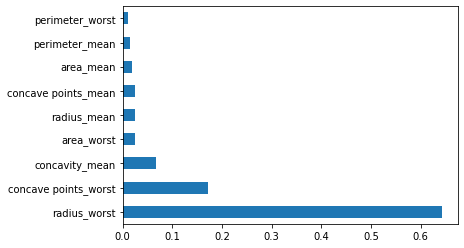

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 12)
tree.fit(x_train, y_train)


X_ = np.array(x)
importance_scores = tree.feature_importances_
indices = np.argsort(importance_scores)
feature_importances = pd.Series(importance_scores, index=X_)
feature_importances.nlargest(10).plot(kind='barh')

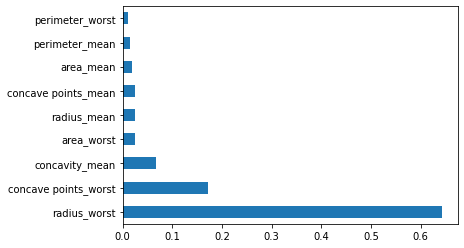

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = DecisionTreeClassifier(criterion = 'entropy', random_state = 12)
knn.fit(x_train, y_train)


X_ = np.array(x)
importance_scores = knn.feature_importances_
indices = np.argsort(importance_scores)
feature_importances = pd.Series(importance_scores, index=X_)
feature_importances.nlargest(10).plot(kind='barh')